<a href="https://colab.research.google.com/github/BryanBM8/SentimentAnalysis-MBTIClassification/blob/main/Salinan_dari_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk, csv, string, random, os, pickle
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.classify import NaiveBayesClassifier, accuracy
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer, PorterStemmer
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
import pandas as pd
from sklearn import svm
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
# column_names = ['sentiment', 'id', 'date', 'query', 'name', 'text']
df = pd.read_csv('/content/sample_data/train.csv', encoding='latin1')
# df.drop(columns=['Unnamed: 0'], inplace=True)
df.head(10)



,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26
5,28b57f3990,http://www.dothebouncy.com/smf - some shameles...,http://www.dothebouncy.com/smf - some shameles...,neutral,night,70-100,Antigua and Barbuda,97929,440.0,223
6,6e0c6d75b1,2am feedings for the baby are fun when he is a...,fun,positive,morning,0-20,Argentina,45195774,2736690.0,17
7,50e14c0bb8,Soooo high,Soooo high,neutral,noon,21-30,Armenia,2963243,28470.0,104
8,e050245fbd,Both of you,Both of you,neutral,night,31-45,Australia,25499884,7682300.0,3
9,fc2cbefa9d,Journey!? Wow... u just became cooler. hehe....,Wow... u just became cooler.,positive,morning,46-60,Austria,9006398,82400.0,109


In [ ]:
# df = df.sample(frac=1).reset_index(drop=True)

In [ ]:
df.shape


(27481, 10)

In [ ]:
df= df.dropna()

In [ ]:
print(df.isnull().sum())

textID              0
text                0
selected_text       0
sentiment           0
Time of Tweet       0
Age of User         0
Country             0
Population -2020    0
Land Area (Km²)     0
Density (P/Km²)     0
dtype: int64


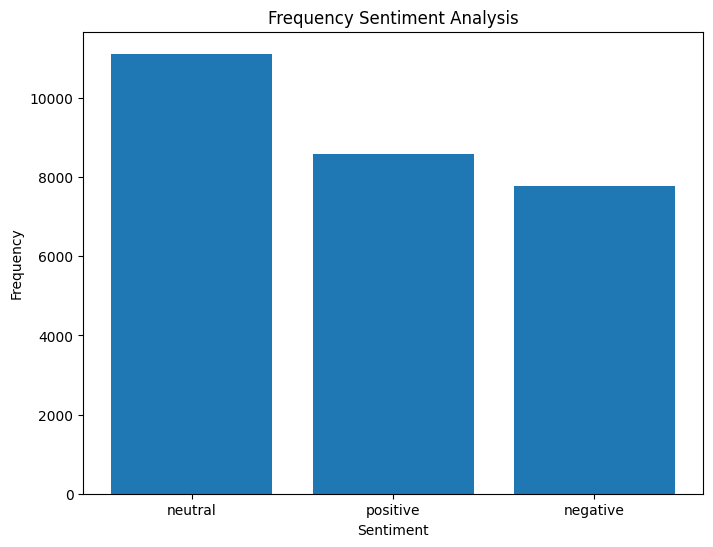

In [ ]:
label_counts = df['sentiment'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Frequency Sentiment Analysis')
plt.show()

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler


X = df[['text']]
y = df['sentiment']


target_size = 7500
label_counts = y.value_counts()


oversample_strategy = {label: target_size for label, count in label_counts.items() if count < target_size}

undersample_strategy = {label: target_size for label, count in label_counts.items() if count > target_size}


over_sampler = RandomOverSampler(sampling_strategy=oversample_strategy, random_state=22)
under_sampler = RandomUnderSampler(sampling_strategy=undersample_strategy, random_state=22)


X_over, y_over = over_sampler.fit_resample(X, y)


X_balanced, y_balanced = under_sampler.fit_resample(X_over, y_over)




In [ ]:
balanced_df = pd.DataFrame({
    'text': np.ravel(X_balanced),
    'sentiment': y_balanced
})


print(balanced_df)

                                                    text sentiment
0                       in bucher`s class?! i cried too!  negative
1      Drinking and smoking is very bad.---but im gro...  negative
2      waiting for sleeping pills to kick in... gonna...  negative
3      chillin after a LOOOONNNGGG day of basketball ...  negative
4                 feeling sick. headache. bored. tireddd  negative
...                                                  ...       ...
22495        its funny, I didn`t even know it was there!  positive
22496  Found out that one great thing about living in...  positive
22497                    THANK YYYYYYYYYOOOOOOOOOOUUUUU!  positive
22498   aah. well, have a few friends over there. Jus...  positive
22499  http://tinyurl.com/ry9wap Hi!!! You are pretty...  positive

[22500 rows x 2 columns]


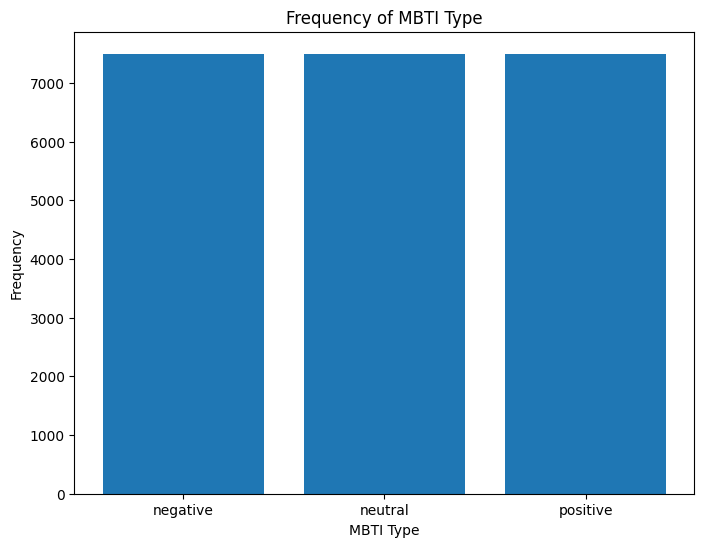

In [ ]:
label_counts = balanced_df['sentiment'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Frequency of Sentiment')
plt.show()

In [ ]:
mbti_labels = {
   'negative':0, 'positive':1, 'neutral':2
}

def transform_label(data):
  label = data['sentiment']
  num = mbti_labels[label]
  return num

balanced_df['sentiment'] = balanced_df.apply(transform_label, axis=1)

print(balanced_df['sentiment'])

0        0
1        0
2        0
3        0
4        0
        ..
22495    1
22496    1
22497    1
22498    1
22499    1
Name: sentiment, Length: 22500, dtype: int64


In [ ]:
print(balanced_df['text'])



0                         in bucher`s class?! i cried too!
1        Drinking and smoking is very bad.---but im gro...
2        waiting for sleeping pills to kick in... gonna...
3        chillin after a LOOOONNNGGG day of basketball ...
4                   feeling sick. headache. bored. tireddd
                               ...                        
22495          its funny, I didn`t even know it was there!
22496    Found out that one great thing about living in...
22497                      THANK YYYYYYYYYOOOOOOOOOOUUUUU!
22498     aah. well, have a few friends over there. Jus...
22499    http://tinyurl.com/ry9wap Hi!!! You are pretty...
Name: text, Length: 22500, dtype: object


In [ ]:
def combine_tweets(text):
    return text.replace('|||', ' ')

In [ ]:
balanced_df['text'] = balanced_df['text'].apply(combine_tweets)
print(balanced_df['text'])

0                         in bucher`s class?! i cried too!
1        Drinking and smoking is very bad.---but im gro...
2        waiting for sleeping pills to kick in... gonna...
3        chillin after a LOOOONNNGGG day of basketball ...
4                   feeling sick. headache. bored. tireddd
                               ...                        
22495          its funny, I didn`t even know it was there!
22496    Found out that one great thing about living in...
22497                      THANK YYYYYYYYYOOOOOOOOOOUUUUU!
22498     aah. well, have a few friends over there. Jus...
22499    http://tinyurl.com/ry9wap Hi!!! You are pretty...
Name: text, Length: 22500, dtype: object


In [ ]:
#Removes links, tags (@username), emojis, punctuation
def preprocess(text):
  text = re.sub(r'@\w+', '', text)
  text = re.sub(r'\bhttps\S+\b', '', text)
  text = re.sub(r'[^\w\s]', '', text)
  text = re.sub(r'\s+', ' ', text).strip()
  return text

balanced_df['text'] = balanced_df['text'].apply(preprocess)
print(balanced_df['text'])

0                             in buchers class i cried too
1         Drinking and smoking is very badbut im grown tho
2        waiting for sleeping pills to kick in gonna be...
3        chillin after a LOOOONNNGGG day of basketball ...
4                      feeling sick headache bored tireddd
                               ...                        
22495             its funny I didnt even know it was there
22496    Found out that one great thing about living in...
22497                       THANK YYYYYYYYYOOOOOOOOOOUUUUU
22498    aah well have a few friends over there Just wo...
22499    httptinyurlcomry9wap Hi You are pretty man I c...
Name: text, Length: 22500, dtype: object


In [ ]:
ENGLISH_STOPWORDS = stopwords.words('english')
PUNCTUATIONS = string.punctuation
LEMMATIZER = WordNetLemmatizer()

In [ ]:
def preprocess_2(text):
  text = word_tokenize(text)
  text = [word for word in text if word not in ENGLISH_STOPWORDS]
  text = [LEMMATIZER.lemmatize(word) for word in text]
  text = [word for word in text if word not in string.punctuation]
  text = [word for word in text if word.isalpha()]
  return text
balanced_df['text'] = balanced_df['text'].apply(preprocess_2)
print(balanced_df['text'])

0                                  [buchers, class, cried]
1              [Drinking, smoking, badbut, im, grown, tho]
2        [waiting, sleeping, pill, kick, gon, na, tired...
3        [chillin, LOOOONNNGGG, day, basketball, hella,...
4                [feeling, sick, headache, bored, tireddd]
                               ...                        
22495                        [funny, I, didnt, even, know]
22496    [Found, one, great, thing, living, Switzerland...
22497                    [THANK, YYYYYYYYYOOOOOOOOOOUUUUU]
22498    [aah, well, friend, Just, wondering, alls, gre...
22499    [Hi, You, pretty, man, I, cant, upload, pic, r...
Name: text, Length: 22500, dtype: object


In [ ]:
train, eval = train_test_split(balanced_df,train_size=0.9,stratify=balanced_df['sentiment'], random_state = 42)

def tokens_to_features(tokens):
    return {token: True for token in tokens}

train_set = [(tokens_to_features(tokens), label) for tokens, label in zip(train['text'], train['sentiment'])]
eval_set = [(tokens_to_features(tokens), label) for tokens, label in zip(eval['text'], eval['sentiment'])]

print(train_set[0:10])
print(eval_set[0:10])



[({'I': True, 'saying': True, 'thing': True, 'yesterday': True, 'So': True, 'droped': True, 'tweet': True, 'No': True, 'smarted': True, 'bussiness': True, 'wise': True, 'find': True, 'real': True, 'people': True}, 2), ({'I': True, 'wish': True, 'could': True, 'sleep': True, 'past': True, 'four': True, 'night': True, 'good': True, 'morning': True}, 1), ({'I': True, 'lost': True, 'first': True, 'Field': True, 'Notes': True, 'notebook': True, 'page': True, 'filling': True, 'RIP': True, 'fieldnotes': True}, 0), ({'FireflyThats': True, 'Nathan': True, 'Fillion': True}, 2), ({'I': True, 'never': True, 'thought': True, 'Id': True, 'die': True, 'alone': True, 'Another': True, 'six': True, 'month': True, 'Ill': True, 'unknown': True}, 0), ({'aww': True, 'anyone': True, 'see': True, 'hollie': True, 'steel': True, 'BGT': True, 'tonight': True, 'wharra': True, 'shame': True}, 0), ({'Thanks': True, 'well': True, 'wish': True, 'hope': True, 'ur': True, 'day': True, 'also': True, 'quite': True, 'succ

In [ ]:
classifier = NaiveBayesClassifier.train(train_set)

predictions = [classifier.classify(features) for features, label in eval_set]
true_labels = [label for features, label in eval_set]

print(classification_report(true_labels, predictions))

              precision    recall  f1-score   support

           0       0.61      0.76      0.67       750
           1       0.65      0.76      0.70       750
           2       0.55      0.32      0.41       750

    accuracy                           0.61      2250
   macro avg       0.60      0.61      0.59      2250
weighted avg       0.60      0.61      0.59      2250



In [ ]:
X = balanced_df['text']
y = balanced_df['sentiment']
X = [' '.join(tokens) for tokens in X]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state=42)

vectorizer = CountVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

clf = svm.SVC(kernel='rbf')
clf.fit(X_train_vect, y_train)


y_pred = clf.predict(X_test_vect)


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.63      0.68       750
           1       0.80      0.72      0.76       767
           2       0.57      0.71      0.63       733

    accuracy                           0.69      2250
   macro avg       0.70      0.69      0.69      2250
weighted avg       0.70      0.69      0.69      2250



In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm

# Load the CSV file containing user input
user_input_df = pd.read_csv('/content/sample_data/KingJames.csv')  # Update path to the CSV file

user_input_df['tweet'] = user_input_df['tweet'].apply(preprocess)
user_input_df['tweet'] = user_input_df['tweet'].apply(preprocess_2)

# Join lists back into strings
user_input_df['tweet'] = user_input_df['tweet'].apply(lambda x: ' '.join(x))

# Combine all the preprocessed texts into a single string
user_input_texts = user_input_df['tweet']
combined_text = ' '.join(user_input_texts)

# Assuming 'vectorizer' and 'clf' are already trained and defined
# Vectorize the combined text
combined_text_vect = vectorizer.transform([combined_text])

# Predict the label for the combined text
predicted_label = clf.predict(combined_text_vect)

print(f"Predicted label for the combined text: {predicted_label[0]}")



In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm

# Load the CSV file containing user input
user_input_df = pd.read_csv('/content/sample_data/KingJames.csv')  # Update path to the CSV file

# Assuming the CSV file has a column named 'text' containing the input text
user_input_texts = user_input_df['tweet']

# Assuming 'vectorizer' and 'clf' are already trained and defined
# Vectorize the user input text
user_input_vect = vectorizer.transform(user_input_texts)

# Predict labels for the user input
predicted_labels = clf.predict(user_input_vect)

# Add predicted labels to the user input DataFrame
user_input_df['predicted_label'] = predicted_labels

# Display the DataFrame with predicted labels
print(user_input_df)

               twitter_id                       date  \
0     1546388845494558723  2022-07-11 07:00:05+00:00   
1     1544418918323871751  2022-07-05 20:32:18+00:00   
2     1544093398411395073  2022-07-04 22:58:48+00:00   
3     1544061075427147777  2022-07-04 20:50:22+00:00   
4     1543640126110240772  2022-07-03 16:57:40+00:00   
...                   ...                        ...   
3228   846163009638666240  2017-03-27 00:52:37+00:00   
3229   846162618058526720  2017-03-27 00:51:03+00:00   
3230   846162142000762880  2017-03-27 00:49:10+00:00   
3231   846161690563690497  2017-03-27 00:47:22+00:00   
3232   846161366461403140  2017-03-27 00:46:05+00:00   

                                                  tweet  predicted_label  
0            b'@bellachef19 Nectarine \xf0\x9f\x8d\x91'                2  
1     b'@Jim_ICE \xf0\x9f\xa4\xa3\xf0\x9f\xa4\xa3\xf...                0  
2     b"\xf0\x9f\x94\xa5\xf0\x9f\x94\xa5\xf0\x9f\x94...                2  
3     b'\xf0\x9f\x98\xa4\xf

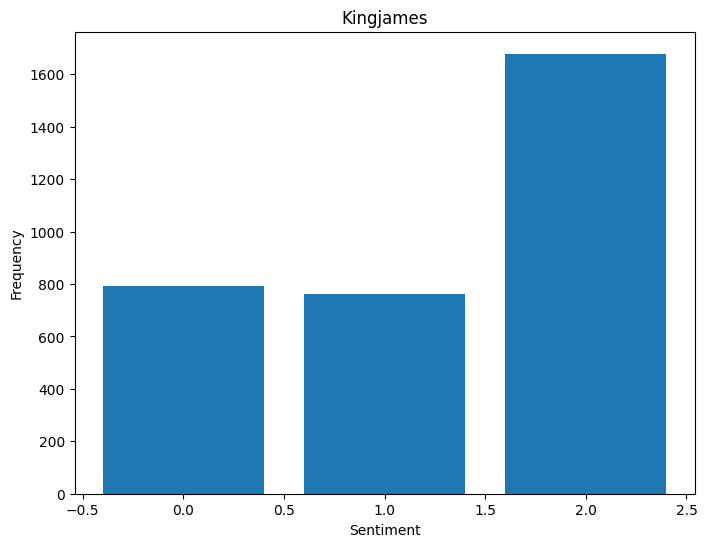

In [ ]:
label_counts = user_input_df['predicted_label'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Kingjames')
plt.show()

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm

# Load the CSV file containing user input
user_input_df = pd.read_csv('/content/sample_data/psy_oppa.csv')  # Update path to the CSV file

# Assuming the CSV file has a column named 'text' containing the input text
user_input_texts = user_input_df['tweet']

# Assuming 'vectorizer' and 'clf' are already trained and defined
# Vectorize the user input text
user_input_vect = vectorizer.transform(user_input_texts)

# Predict labels for the user input
predicted_labels = clf.predict(user_input_vect)

# Add predicted labels to the user input DataFrame
user_input_df['predicted_label'] = predicted_labels

# Display the DataFrame with predicted labels
print(user_input_df)

               twitter_id                       date  \
0     1542673091469266944  2022-07-01 00:55:01+00:00   
1     1539982120218550272  2022-06-23 14:42:03+00:00   
2     1534806546168750080  2022-06-09 07:56:10+00:00   
3     1534473815945666560  2022-06-08 09:54:01+00:00   
4     1533302899794538498  2022-06-05 04:21:13+00:00   
...                   ...                        ...   
2810   395395963625304065  2013-10-30 03:45:18+00:00   
2811   395384364361478147  2013-10-30 02:59:13+00:00   
2812   395384223382532097  2013-10-30 02:58:39+00:00   
2813   395349198154899456  2013-10-30 00:39:28+00:00   
2814   395317869161902080  2013-10-29 22:34:59+00:00   

                                                  tweet  predicted_label  
0     b"\xed\x97\xa4\xec\x9d\xb4\xec\xa6\x88(Heize) ...                2  
1     b"PSY - '9INTRO' Performance Video https://t.c...                2  
2     b"RT @psy_oppa: PSY - 'That That (prod. &amp; ...                0  
3     b"PSY - 'That That (p

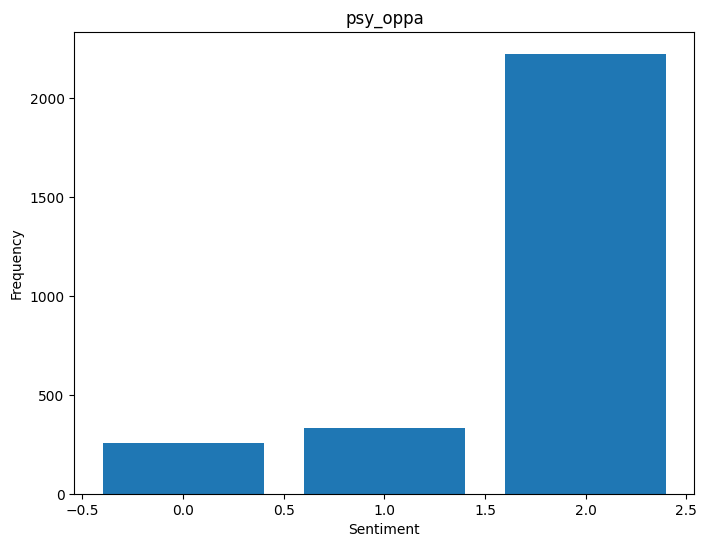

In [ ]:
label_counts = user_input_df['predicted_label'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('psy_oppa')
plt.show()

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm

# Load the CSV file containing user input
user_input_df = pd.read_csv('/content/sample_data/Adele.csv')  # Update path to the CSV file

# Assuming the CSV file has a column named 'text' containing the input text
user_input_texts = user_input_df['tweet']

# Assuming 'vectorizer' and 'clf' are already trained and defined
# Vectorize the user input text
user_input_vect = vectorizer.transform(user_input_texts)

# Predict labels for the user input
predicted_labels = clf.predict(user_input_vect)

# Add predicted labels to the user input DataFrame
user_input_df['predicted_label'] = predicted_labels

# Display the DataFrame with predicted labels
print(user_input_df)

              twitter_id                       date  \
0    1543973875687596033  2022-07-04 15:03:52+00:00   
1    1543973499508752386  2022-07-04 15:02:22+00:00   
2    1543254652807954439  2022-07-02 15:25:56+00:00   
3    1543254498247835648  2022-07-02 15:25:19+00:00   
4    1542530240060194816  2022-06-30 15:27:22+00:00   
..                   ...                        ...   
360          29513802932  2010-11-02 22:54:44+00:00   
361          29419669509  2010-11-02 00:05:24+00:00   
362          29104016829  2010-10-29 16:37:36+00:00   
363          27248872792  2010-10-13 14:58:33+00:00   
364          24503943707  2010-09-14 19:47:33+00:00   

                                                 tweet  predicted_label  
0    b'Thank you to my band and my crew for two sea...                0  
1    b'Hyde Park Night 2! My heart is absolutely fu...                0  
2    b'Thank you my loves, I can\xe2\x80\x99t wait ...                1  
3    b'Hyde Park Night 1! What a crowd!! ht

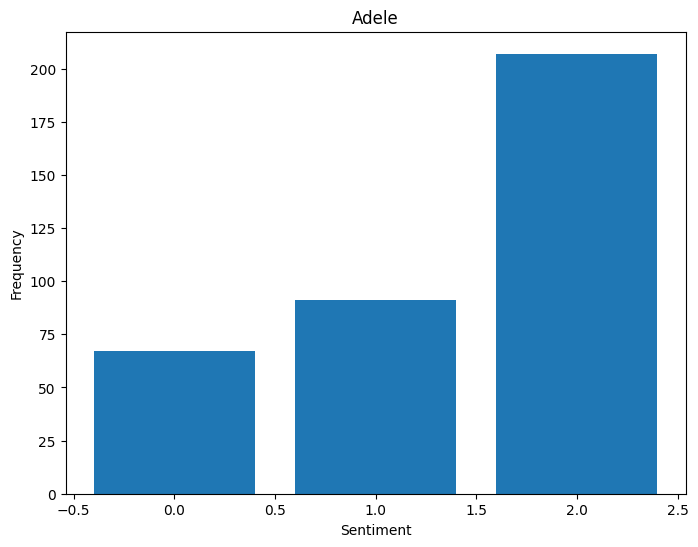

In [ ]:
label_counts = user_input_df['predicted_label'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Adele')
plt.show()

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm

# Load the CSV file containing user input
user_input_df = pd.read_csv('/content/sample_data/russwest44.csv')  # Update path to the CSV file

# Assuming the CSV file has a column named 'text' containing the input text
user_input_texts = user_input_df['tweet']

# Assuming 'vectorizer' and 'clf' are already trained and defined
# Vectorize the user input text
user_input_vect = vectorizer.transform(user_input_texts)

# Predict labels for the user input
predicted_labels = clf.predict(user_input_vect)

# Add predicted labels to the user input DataFrame
user_input_df['predicted_label'] = predicted_labels

# Display the DataFrame with predicted labels
print(user_input_df)

               twitter_id                       date  \
0     1546603105978040320  2022-07-11 21:11:29+00:00   
1     1546603097295912965  2022-07-11 21:11:27+00:00   
2     1541786261395873792  2022-06-28 14:11:04+00:00   
3     1540488261910597632  2022-06-25 00:13:17+00:00   
4     1538909931033747456  2022-06-20 15:41:33+00:00   
...                   ...                        ...   
3206    37891924459257857  2011-02-16 15:11:53+00:00   
3207    37891097594167299  2011-02-16 15:08:36+00:00   
3208    37623084760436736  2011-02-15 21:23:37+00:00   
3209    37181107275300864  2011-02-14 16:07:21+00:00   
3210    36915266189262848  2011-02-13 22:30:59+00:00   

                                                  tweet  predicted_label  
0     b'Anybody that know my mom then they know lol....                2  
1     b'My mom is who first got me into fashion &amp...                0  
2                            b'https://t.co/y3V4P1GwS1'                2  
3     b'Yoooo\xe2\x80\xa6 w

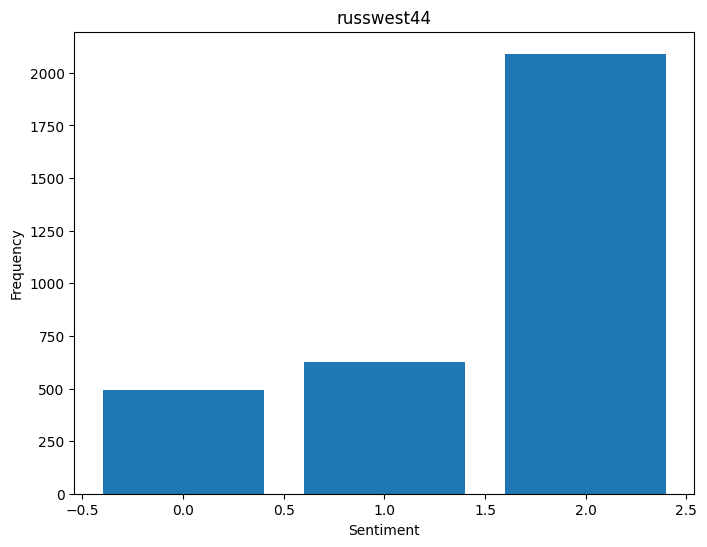

In [ ]:
label_counts = user_input_df['predicted_label'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('russwest44')
plt.show()

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm

# Load the CSV file containing user input
user_input_df = pd.read_csv('/content/sample_data/stephenasmith.csv')  # Update path to the CSV file

# Assuming the CSV file has a column named 'text' containing the input text
user_input_texts = user_input_df['tweet']

# Assuming 'vectorizer' and 'clf' are already trained and defined
# Vectorize the user input text
user_input_vect = vectorizer.transform(user_input_texts)

# Predict labels for the user input
predicted_labels = clf.predict(user_input_vect)

# Add predicted labels to the user input DataFrame
user_input_df['predicted_label'] = predicted_labels

# Display the DataFrame with predicted labels
print(user_input_df)

               twitter_id                       date  \
0     1546591198063857671  2022-07-11 20:24:10+00:00   
1     1545217606097010690  2022-07-08 01:26:00+00:00   
2     1544897411717468160  2022-07-07 04:13:40+00:00   
3     1544643607445086209  2022-07-06 11:25:08+00:00   
4     1543301505133985793  2022-07-02 18:32:06+00:00   
...                   ...                        ...   
3241  1186678289257160704  2019-10-22 16:18:46+00:00   
3242  1186657800824467456  2019-10-22 14:57:21+00:00   
3243  1186629089534369792  2019-10-22 13:03:16+00:00   
3244  1186626774190440448  2019-10-22 12:54:04+00:00   
3245  1186477001281945601  2019-10-22 02:58:55+00:00   

                                                  tweet  predicted_label  
0     b'Really @Rjeff24? Really? Of all the teams yo...                0  
1     b'Proud of you, my dude, @Realclark25. No one ...                0  
2     b'Enjoy folks. Everyone\xe2\x80\x99s entitled ...                1  
3     b'And so it is @Dwyan

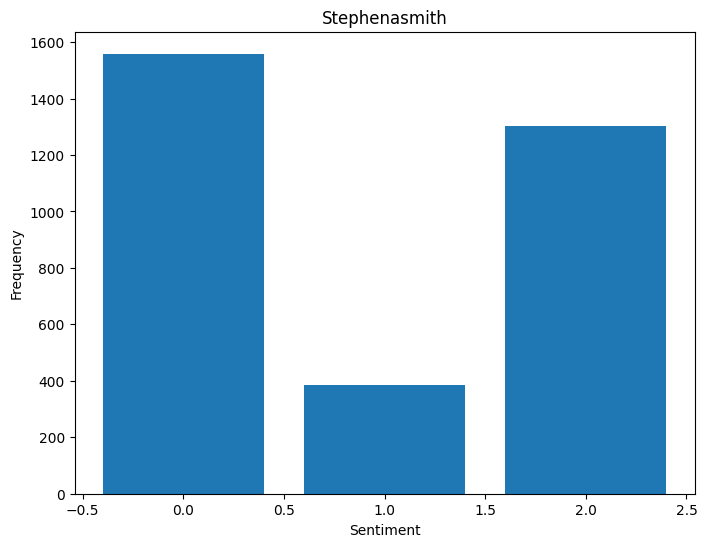

In [ ]:
label_counts = user_input_df['predicted_label'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Stephenasmith')
plt.show()